In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import numpy as np

Task1

Question1

Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form (θ1*x+θ0) for any given values of (θ0,θ1)

In [3]:
np.random.seed(45)
num_samples=40

x1=np.random.uniform(-1,1,num_samples)
f_x=3*x1+4
eps= np.random.randn(num_samples)
y=f_x+eps

In [4]:
theta_0=torch.randn(1,requires_grad=True)
theta_1=torch.randn(1,requires_grad=True)

x= torch.from_numpy(x1).reshape(-1,1 )
y_actual=torch.from_numpy(y).reshape(-1, 1)

In [5]:
theta0=theta_0.clone().detach().requires_grad_(True)
theta1=theta_1.clone().detach().requires_grad_(True)

def fit(theta0,theta1,x_val):
    return theta0+x_val*theta1

def loss(theta0,theta1,x,y):
    return ((fit(theta0,theta1,x)-y)**2).mean()

loss_value=loss(theta0,theta1,x,y_actual)
loss_value.backward()
grad1_theta0=theta0.grad
grad1_theta1=theta1.grad
gradfull_0=grad1_theta0.item()
gradfull_1=grad1_theta1.item()
print("True Gradient of theta0:",grad1_theta0.item())
print("True Gradient of theta1:",grad1_theta1.item())

True Gradient of theta0: -6.0246381759643555
True Gradient of theta1: -0.5868812203407288


Question2

Using the same (θ0,θ1) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [6]:
theta0=theta_0.clone().detach().requires_grad_(True)
theta1=theta_1.clone().detach().requires_grad_(True)

def fit(theta0,theta1,x_val):
    return theta0+x_val*theta1

def loss(theta0,theta1,x,y):
    return ((fit(theta0,theta1,x)-y)**2).mean()

gradient0=[]
gradient1=[]

for i in range(len(x)):

    theta0.grad=None
    theta1.grad=None

    loss_value=loss(theta0,theta1,x[i],y_actual[i])
    loss_value.backward()
    gradient0.append(theta0.grad)
    gradient1.append(theta1.grad)

gradstochastic_0=np.array(gradient0).mean()
gradstochastic_1=np.array(gradient1).mean()
print(f"Stochastic Gradient of theta0: {np.array(gradient0).mean()}")
print(f"Stochastic Gradient of theta1: {np.array(gradient1).mean()}")

Stochastic Gradient of theta0: -6.0246381759643555
Stochastic Gradient of theta1: -0.5868812799453735


In [7]:
print("True Gradient of theta0:",grad1_theta0.item())
print(f"Stochastic Gradient of theta0: {np.array(gradient0).mean()}")
print("True Gradient of theta1:",grad1_theta1.item())
print(f"Stochastic Gradient of theta1: {np.array(gradient1).mean()}")

True Gradient of theta0: -6.0246381759643555
Stochastic Gradient of theta0: -6.0246381759643555
True Gradient of theta1: -0.5868812203407288
Stochastic Gradient of theta1: -0.5868812799453735


Question 3

Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ(or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001
for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
np.random.seed(45)
num_samples=40

x1=np.random.uniform(-1,1,num_samples)
f_x=3*x1+4
eps= np.random.randn(num_samples)
y_actual=f_x+eps

theta_val=np.random.uniform(-1,1,2)

In [10]:
def loss(x,theta0,theta1,y):
    return np.sum((y-(theta0+theta1*x))**2)/len(x)

In [11]:
def full_batchgradient(x,theta0,theta1,y,E,learning_rate,epilson):
    loss_list,thetavalues=[],[]
    thetavalues.append(np.array([theta0,theta1]))
    theta0_prev,theta1_prev=0.0,0.0
    diff_loss=[]
    for epoch in range(1,E + 1):
        per=np.random.permutation(len(y))
        x_new=x[per]
        y_new=y[per]
        grad_theta_0=np.sum(-2*(y_new-(theta0+theta1*x_new)))/len(x_new)
        grad_theta_1=np.sum(-2*(y_new-(theta0+x*theta1))*x_new)/len(x_new)
        theta0=theta0-learning_rate*grad_theta_0
        theta1=theta1-learning_rate*grad_theta_1
        loss_list.append(loss(x_new,theta0,theta1,y_new))
        thetavalues.append(np.array([theta0,theta1]))
        t1=np.array([theta0,theta1])
        t2=np.array([theta0_prev,theta1_prev])
        diff_loss.append(np.linalg.norm(abs(t1-t2)))
        if (abs(theta0-theta0_prev)<epilson and abs(theta1-theta1_prev)<epilson):
            break
        theta0_prev=theta0
        theta1_prev=theta1
    return epoch,loss_list,thetavalues,diff_loss

def mini_batchgradient(x,theta0,theta1,y,E,learning_rate,epilson,batch_size):
    loss_list,theta_values,diff_loss=[],[],[]
    theta_values.append(np.array([theta0,theta1]))
    theta0_prev,theta1_prev=0.0,0.0
    for epoch in range(1,E + 1):
        per=np.random.permutation(len(y))
        x_new=x[per]
        y_new=y[per]
        for i in range(0,len(y),batch_size):
            x_val=x_new[i:i+batch_size]
            y_val=y_new[i:i+batch_size]
            grad_theta_0=np.sum(-2*(y_val-(theta0+theta1*x_val)))/len(x_val)
            grad_theta_1=np.sum(-2*(y_val-(theta0+x_val*theta1))*x_val)/len(x_val)
            theta0=theta0-learning_rate*grad_theta_0
            theta1=theta1-learning_rate*grad_theta_1
        loss_list.append(loss(x_new,theta0,theta1,y_new))
        theta_values.append(np.array([theta0,theta1]))
        t1=np.array([theta0,theta1])
        t2=np.array([theta0_prev,theta1_prev])
        diff_loss.append(np.linalg.norm(abs(t1-t2)))
        if (abs(theta0-theta0_prev)<epilson and abs(theta1-theta1_prev)<epilson):
            break
        theta0_prev=theta0
        theta1_prev=theta1
    return epoch,loss_list,theta_values,diff_loss

def stochastic_gradient(x,theta0,theta1,y,E,learning_rate,epilson):
    loss_list,theta_values,diff_loss=[],[],[]
    theta_values.append(np.array([theta0,theta1]))
    theta0_prev,theta1_prev=0.0,0.0
    for epoch in range(1,E + 1):
        per=np.random.permutation(len(y))
        x_new=x[per]
        y_new=y[per]
        for i in range(len(y)):
            y_l=np.array([y_new[i]])
            x_l=np.array([x_new[i]])
            grad_theta_0=np.sum(-2*(y_l-(theta0+theta1*x_l)))/len(x_l)
            grad_theta_1=np.sum(-2*(y_l -(theta0+x_l*theta1))*x_l)/len(x_l)
            theta0=theta0-learning_rate*grad_theta_0
            theta1=theta1-learning_rate*grad_theta_1
        loss_list.append(loss(x_new,theta0,theta1,y_new))
        theta_values.append(np.array([theta0,theta1]))
        t1=np.array([theta0,theta1])
        t2=np.array([theta0_prev,theta1_prev])
        diff_loss.append(np.linalg.norm(abs(t1-t2)))
        if (abs(theta0-theta0_prev)<epilson and abs(theta1-theta1_prev)<epilson):
            break
        theta0_prev=theta0
        theta1_prev=theta1
    return epoch,loss_list,theta_values,diff_loss

In [12]:
f = lambda theta0,theta1: loss(x1, theta0,theta1, y_actual)

full,mini,stochastic=[],[],[]

for i in range(10):
    fullepochs,full_batch_losses,full_batch_theta,full_batch_conv=full_batchgradient(x1,theta_val[0],theta_val[1],y_actual,10000,0.001,0.001)
    miniepochs,mini_batch_losses,mini_batch_theta,mini_batch_conv=mini_batchgradient(x1,theta_val[0],theta_val[1], y_actual,10000,0.001,0.001,20)
    stochasticepochs, stochastic_losses, stochastic_theta,stochastic_conv= stochastic_gradient(x1,theta_val[0],theta_val[1],y_actual,10000,0.001,0.001)
    full.append(fullepochs)
    mini.append(miniepochs)
    stochastic.append(stochasticepochs)

avgfullepochs=int(np.array(full).mean())
avgminiepochs=int(np.array(mini).mean())
avgstochasticepochs=int(np.array(stochastic).mean())

print(f"Average number of steps taken by Full Gradient Descent: {avgfullepochs}")
print(f"Average number of steps taken by Mini Batch Gradient Descent: {avgminiepochs*2}")
print(f"Average number of steps taken by Stoachastic Gradient Descent: {avgstochasticepochs*40}")

Average number of steps taken by Full Gradient Descent: 1220
Average number of steps taken by Mini Batch Gradient Descent: 1474
Average number of steps taken by Stoachastic Gradient Descent: 6520


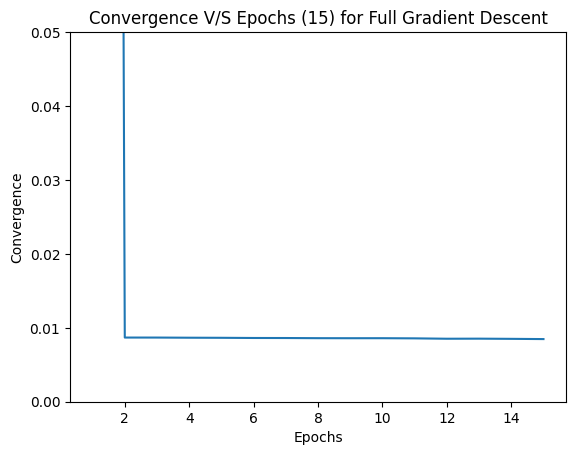

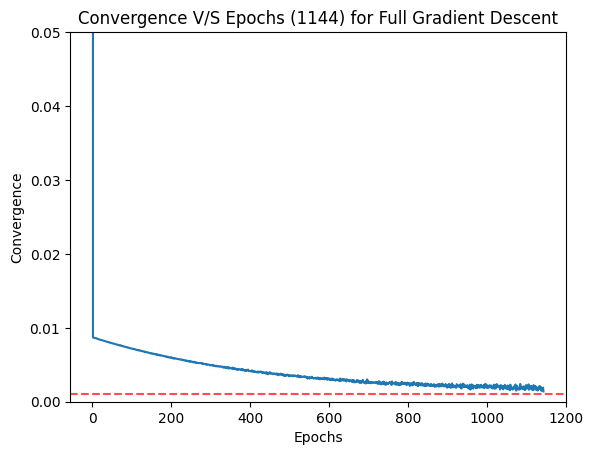

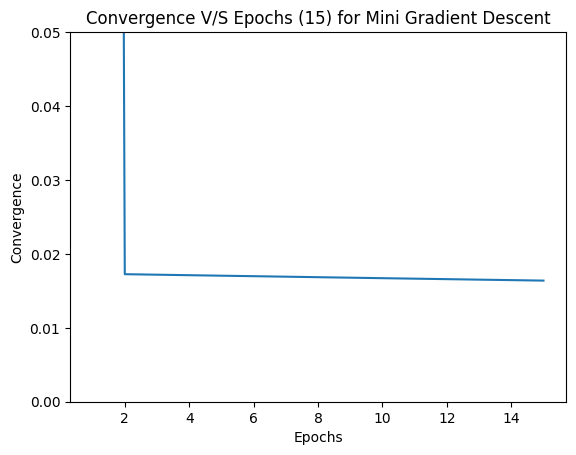

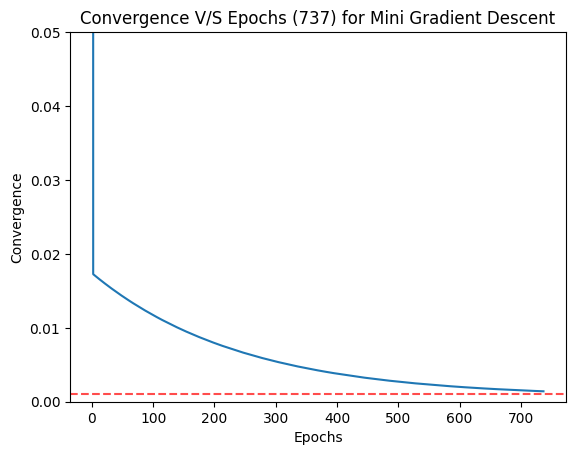

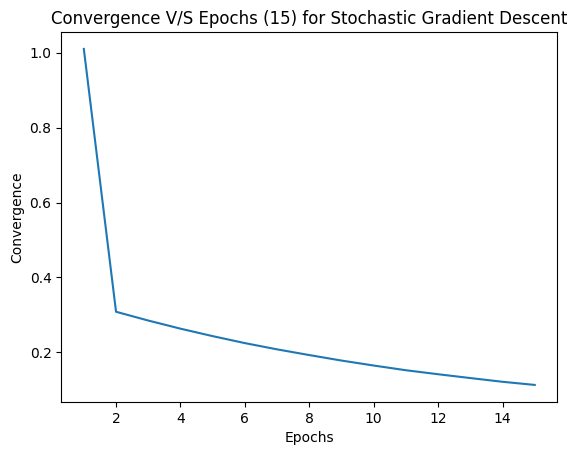

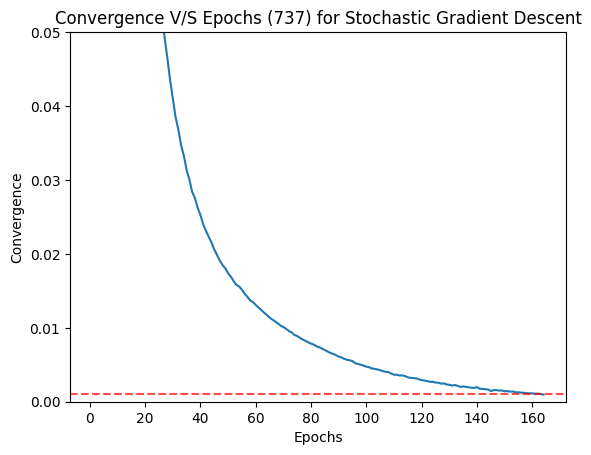

In [13]:
plt.plot(np.arange(1,16),full_batch_conv[:15])
plt.title("Convergence V/S Epochs (15) for Full Gradient Descent")
plt.ylim([0.0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.show()

plt.plot(np.arange(1,fullepochs+1),full_batch_conv)
plt.title(f"Convergence V/S Epochs ({fullepochs}) for Full Gradient Descent")
plt.ylim([0.0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.axhline(y=0.001,color='red',linestyle='--',alpha=0.7)
plt.plot
plt.show()

plt.plot(np.arange(1,16),mini_batch_conv[:15])
plt.title("Convergence V/S Epochs (15) for Mini Gradient Descent")
plt.ylim([0.0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.show()

plt.plot(np.arange(1,miniepochs+1),mini_batch_conv)
plt.title(f"Convergence V/S Epochs ({miniepochs}) for Mini Gradient Descent")
plt.ylim([0.0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.axhline(y=0.001,color='red',linestyle='--',alpha=0.7)
plt.plot
plt.show()

plt.plot(np.arange(1,16),stochastic_conv[:15])
plt.title("Convergence V/S Epochs (15) for Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.show()

plt.plot(np.arange(1,stochasticepochs+1),stochastic_conv)
plt.title(f"Convergence V/S Epochs ({miniepochs}) for Stochastic Gradient Descent")
plt.ylim([0.0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.axhline(y=0.001,color='red',linestyle='--',alpha=0.7)
plt.plot
plt.show()

In [14]:
def create_XYZ(f):
    x=np.linspace(-5,5,100)
    y=np.linspace(-5,5,100)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j]=f(X[i,j],Y[i,j])
    return X,Y,Z

def create_contour_plot(loss_func, ax_plot, theta_values, i, title):
    X, Y, Z = create_XYZ(loss_func)

    contour_plot=ax_plot.contourf(X,Y,Z,levels=20,cmap='magma',alpha=0.85)
    plt.colorbar(contour_plot,ax=ax_plot)
    
    ax_plot.scatter(theta_values[i][0],theta_values[i][1],marker='x',color='white')
    ax_plot.scatter(theta_values[-1][0],theta_values[-1][1],marker='x',color='white')
    ax_plot.axhline(y=theta_values[i][1],color='red',linestyle='--',alpha=0.7)
    ax_plot.axvline(x=theta_values[i][0],color='red',linestyle='--',alpha=0.7)
    ax_plot.set_title(title+f' Epoch:{i + 1}')
    ax_plot.set_xlabel(r"$\theta_0$")
    ax_plot.set_ylabel(r"$\theta_1$")

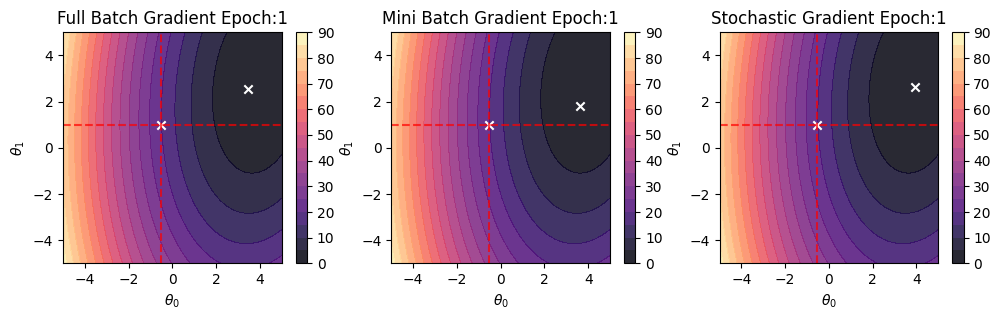

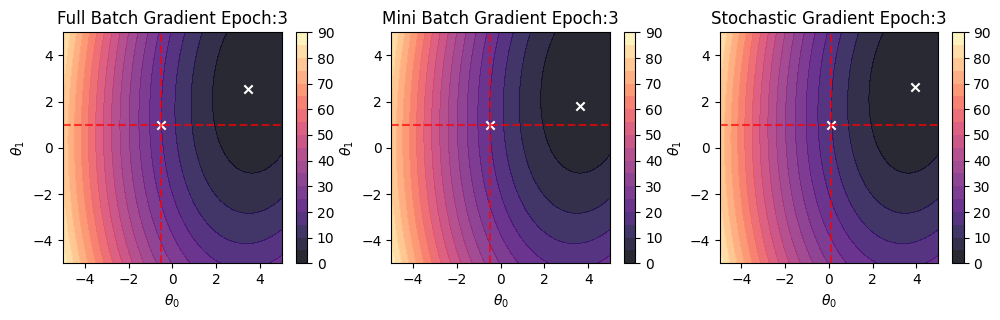

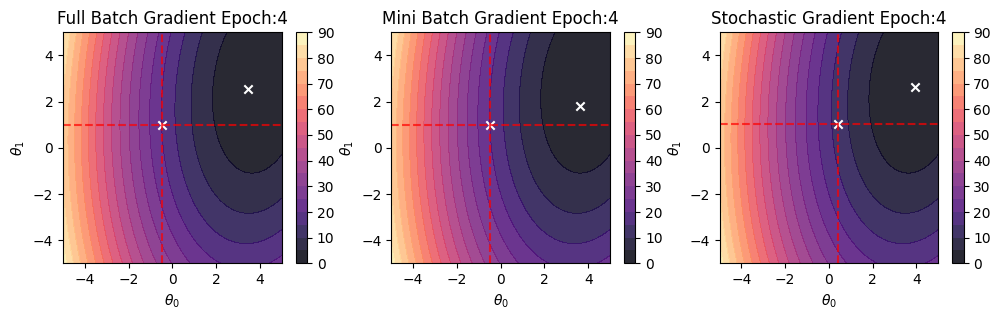

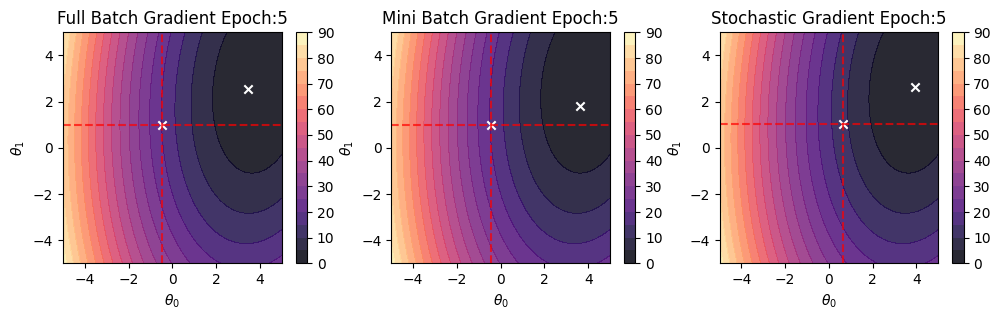

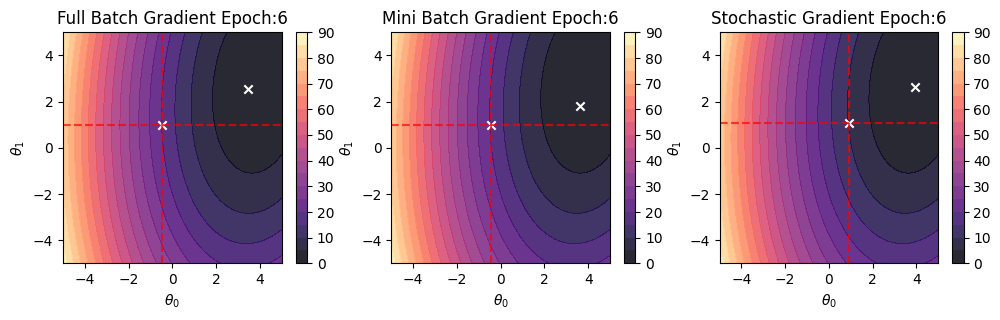

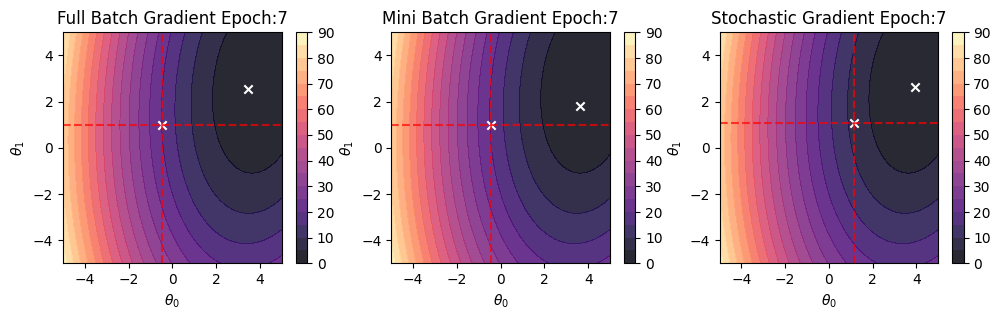

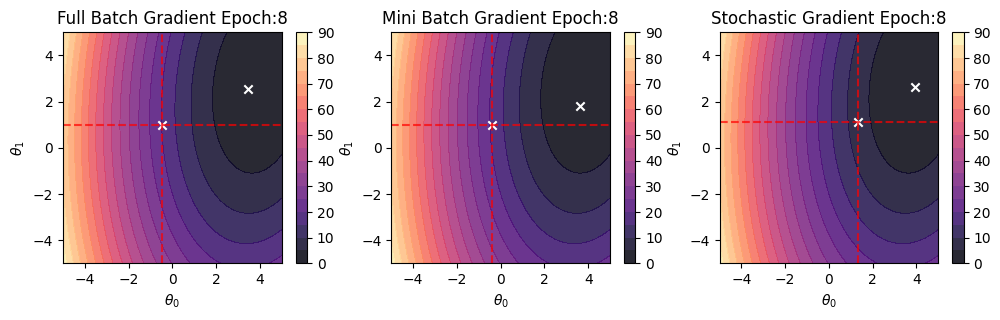

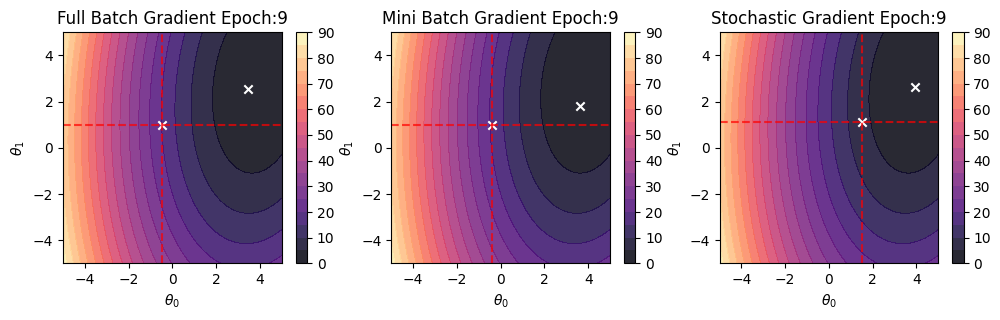

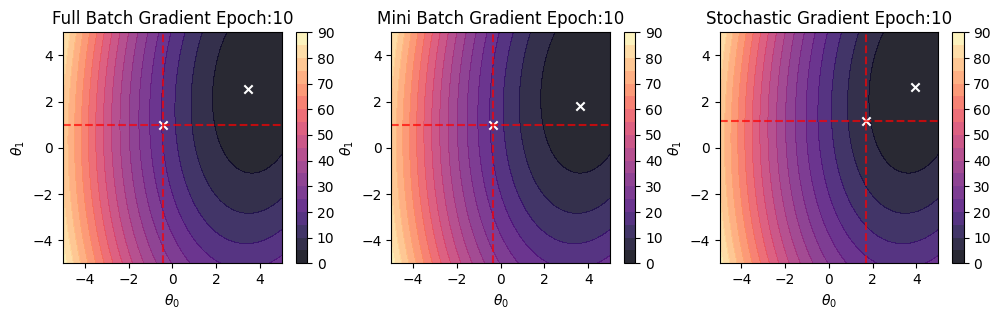

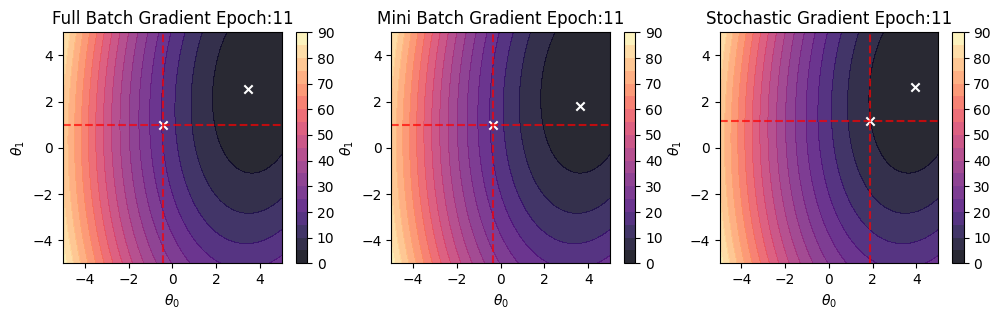

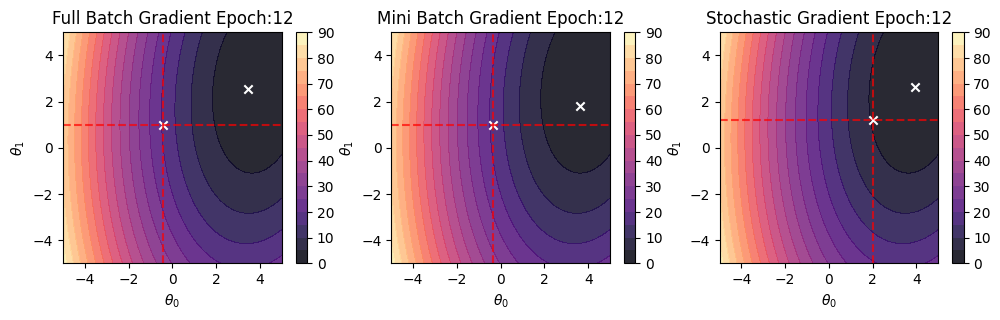

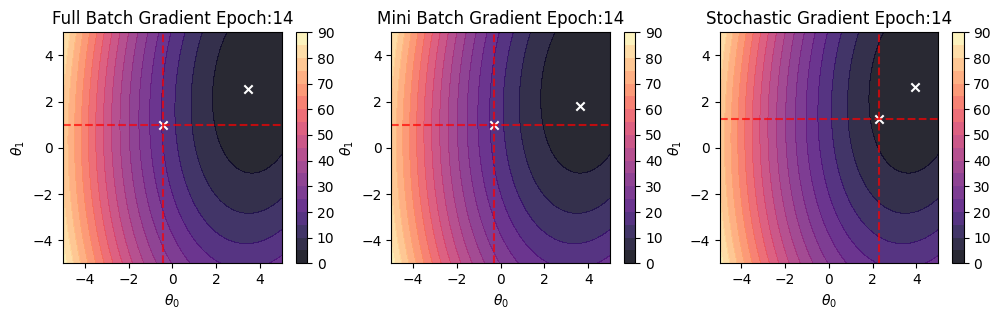

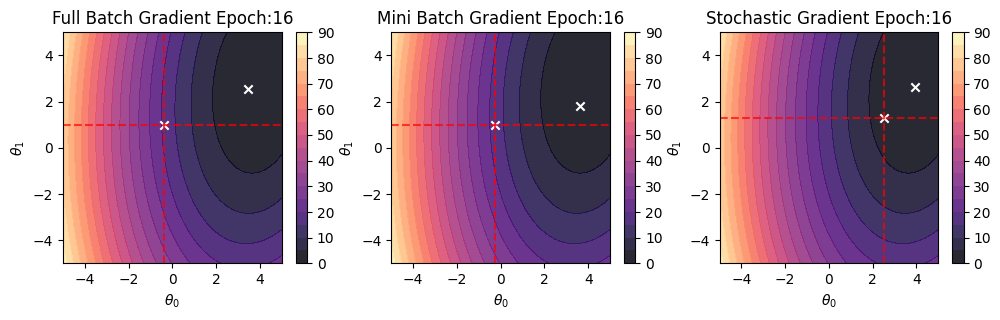

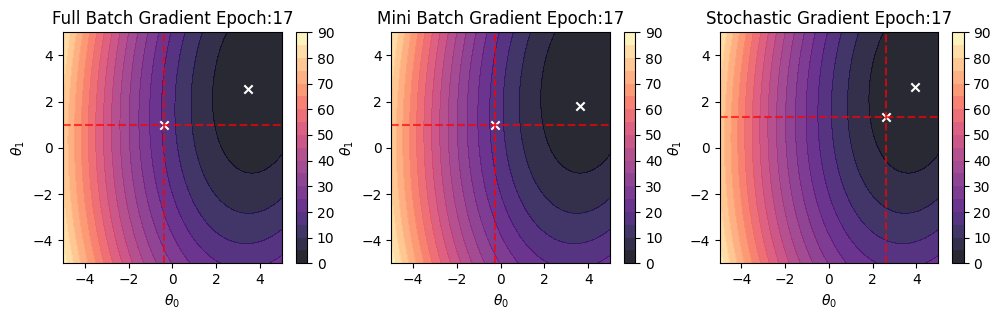

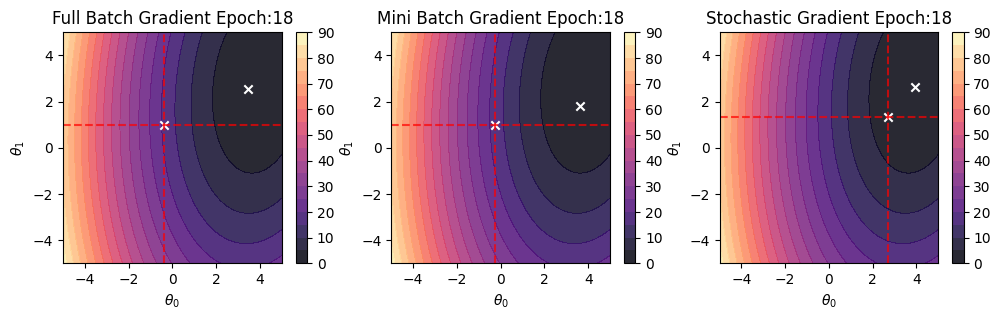

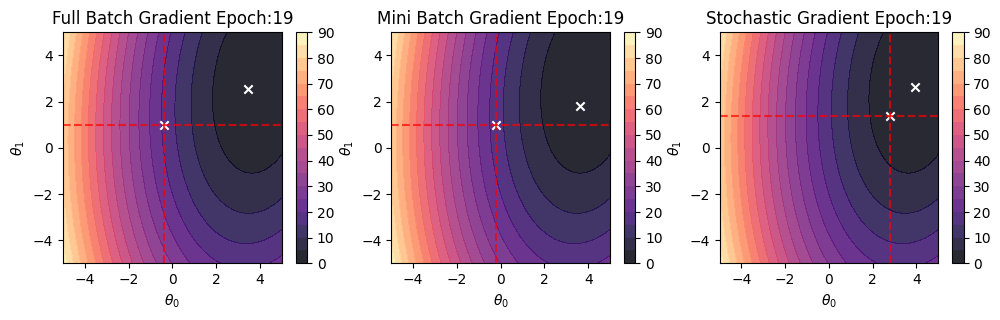

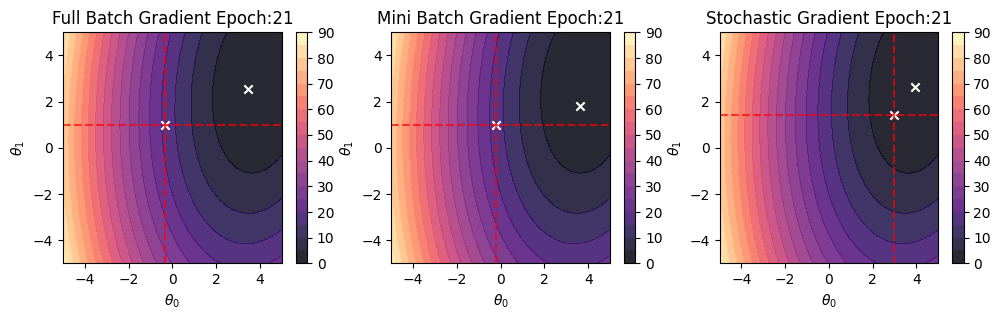

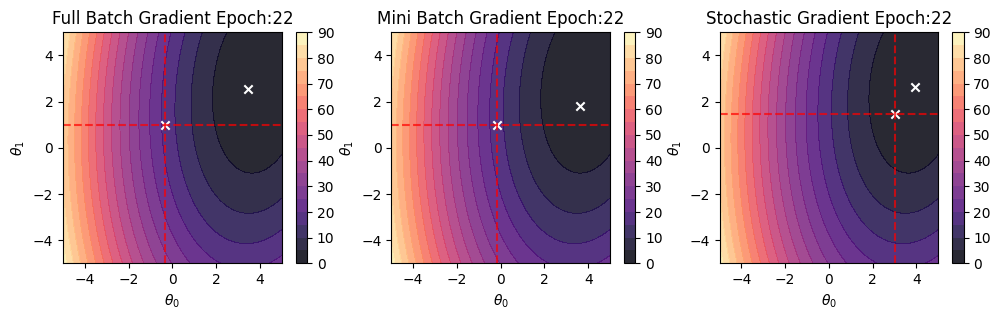

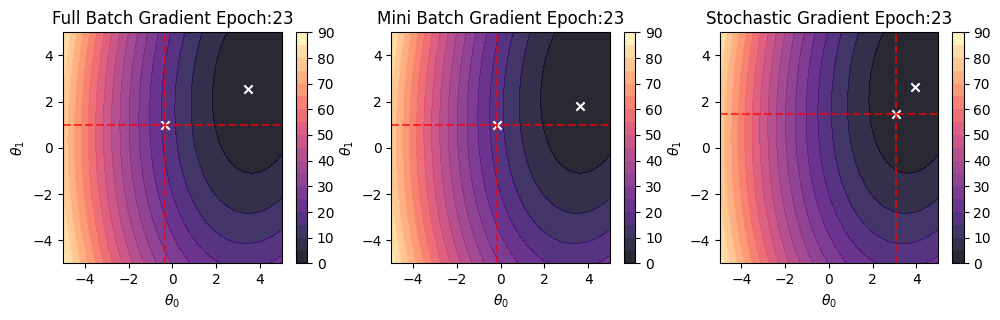

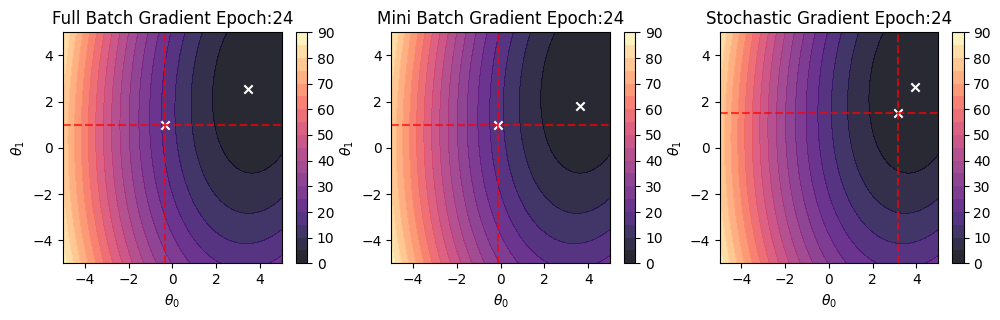

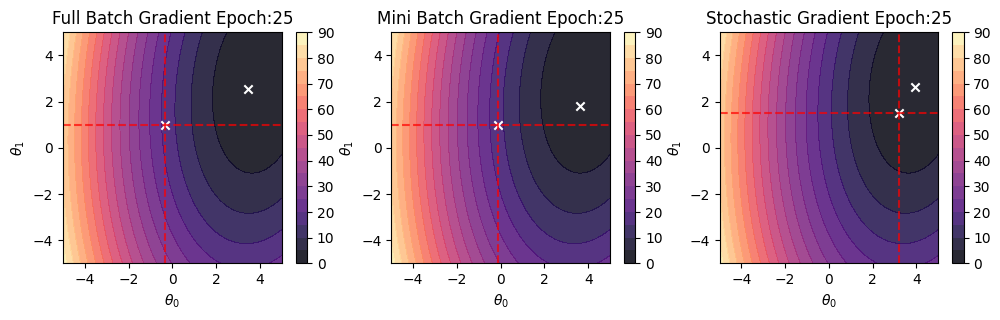

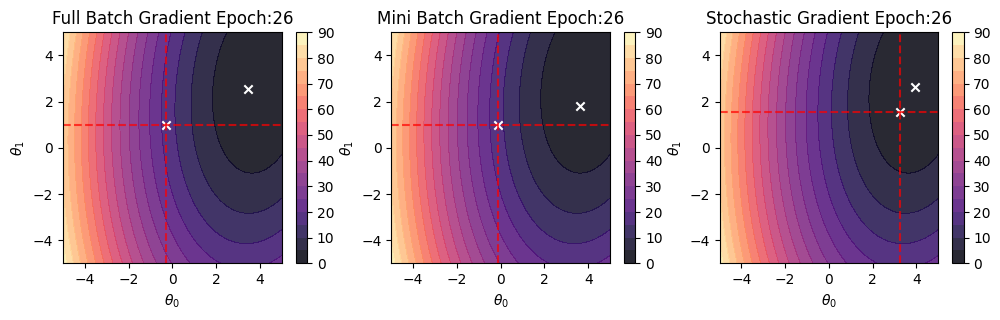

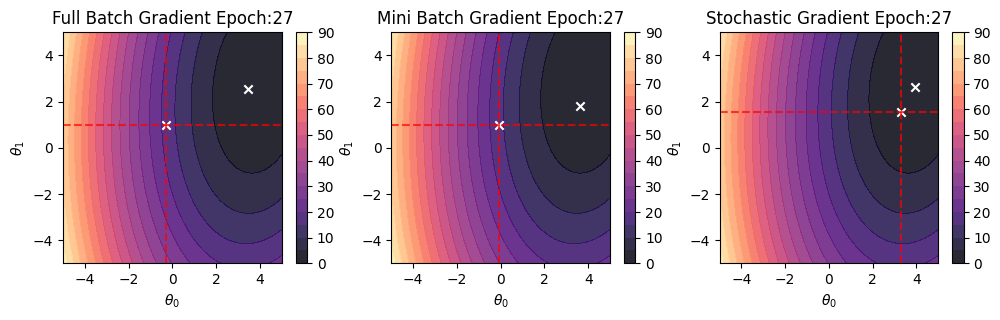

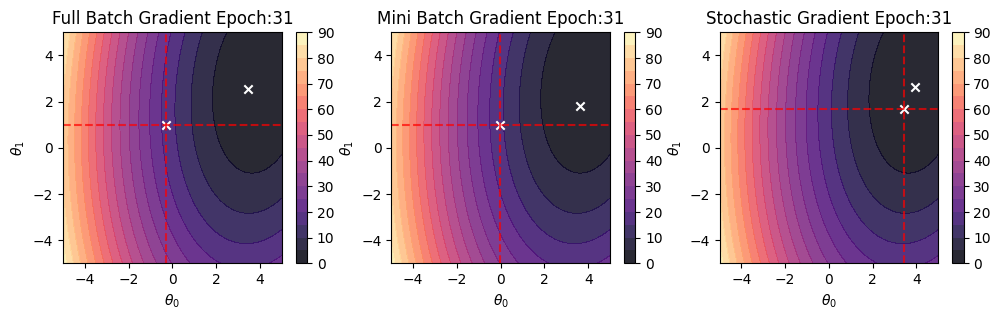

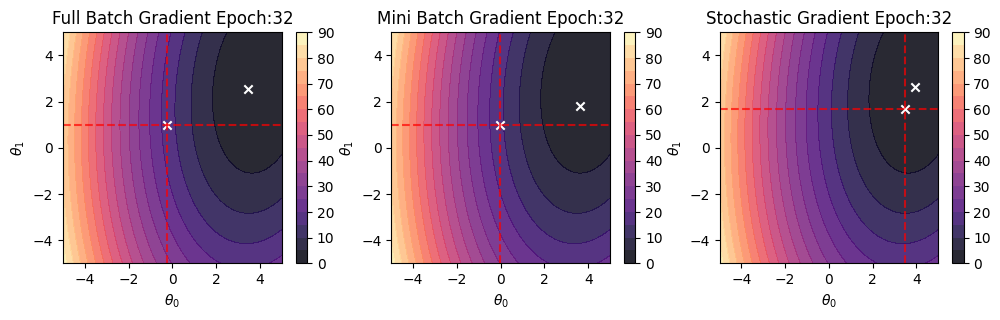

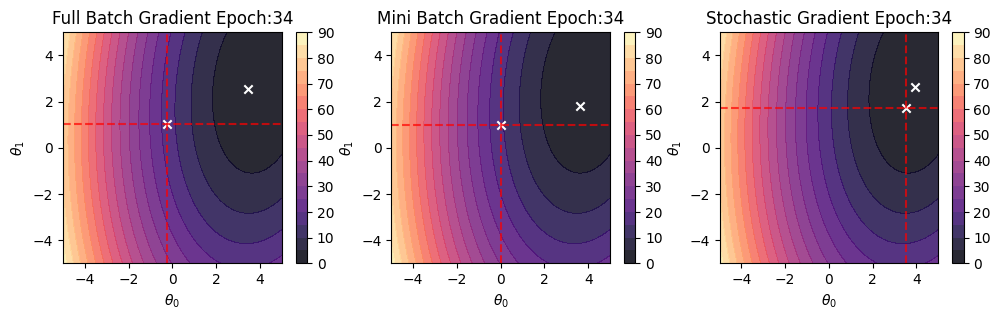

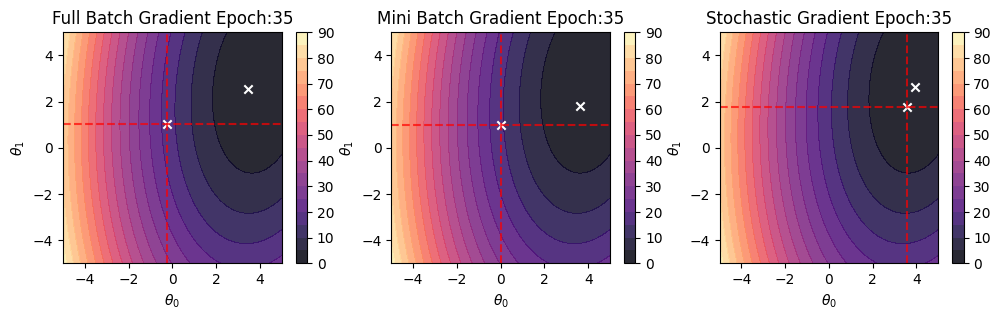

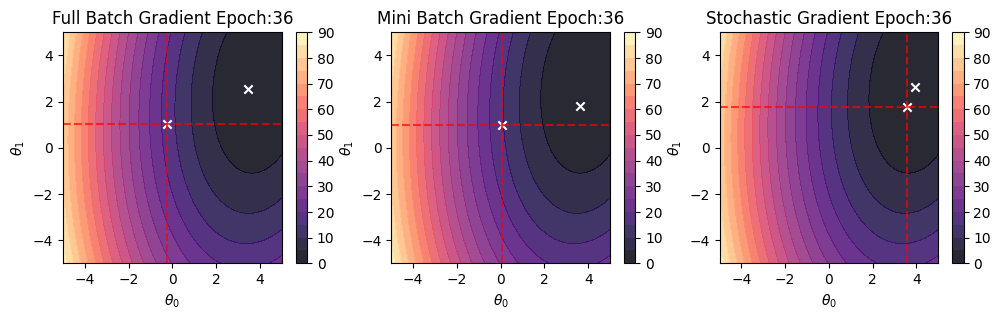

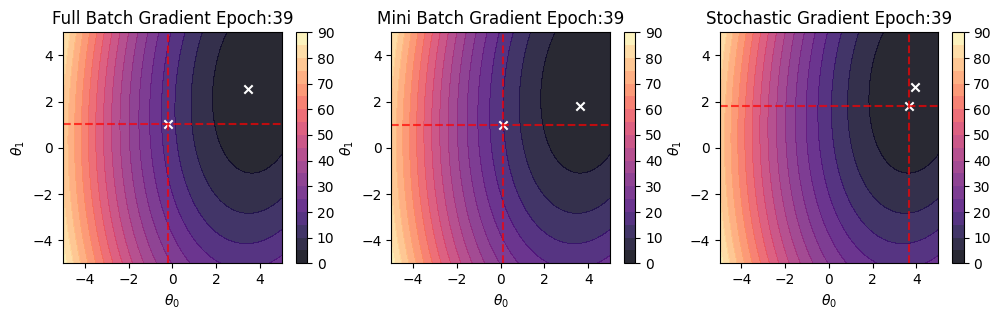

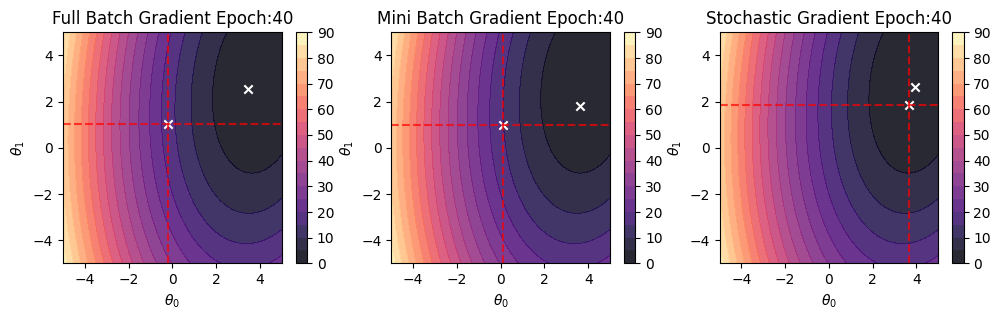

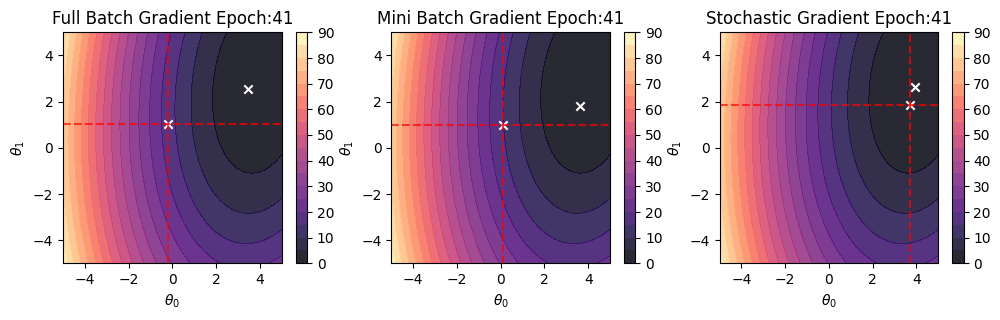

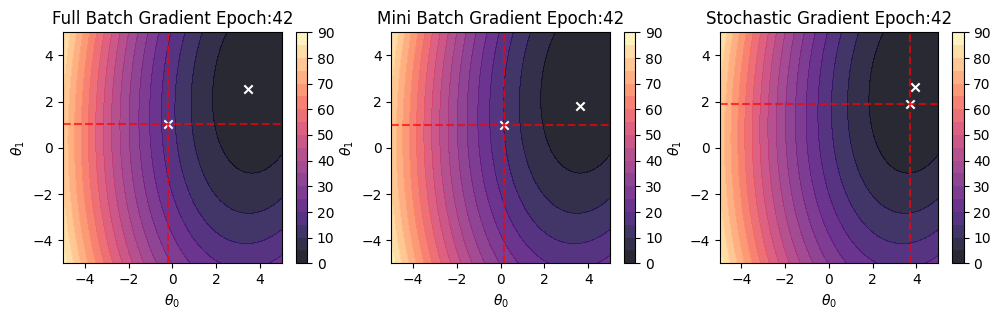

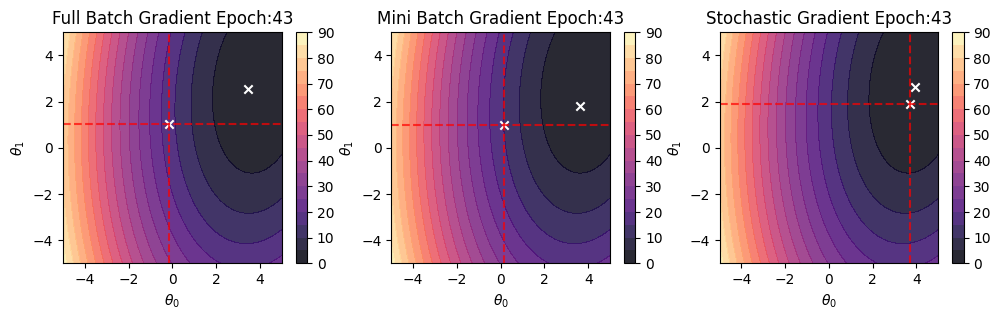

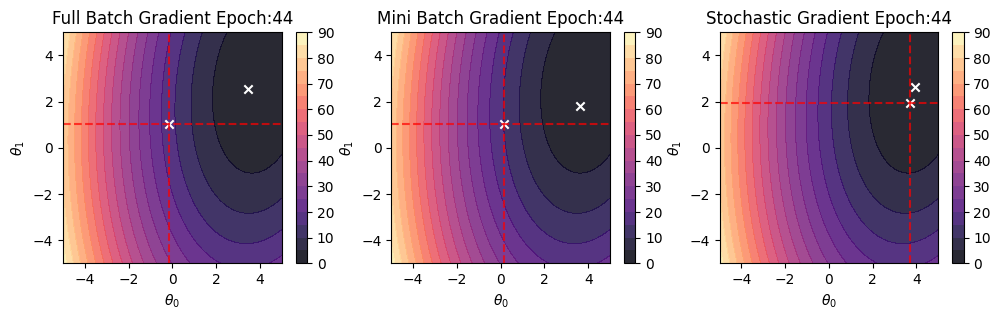

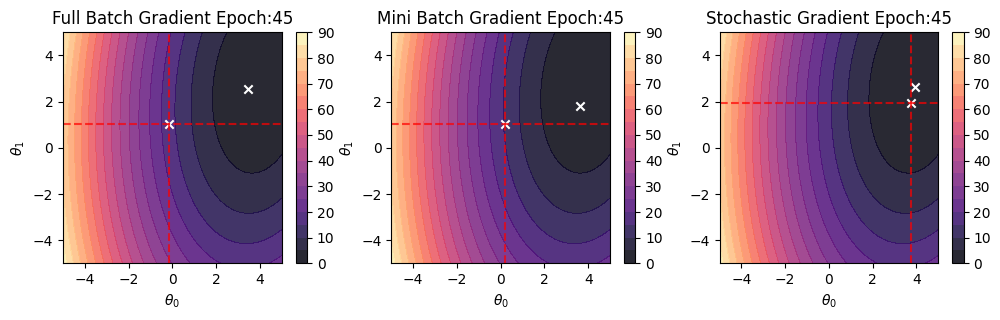

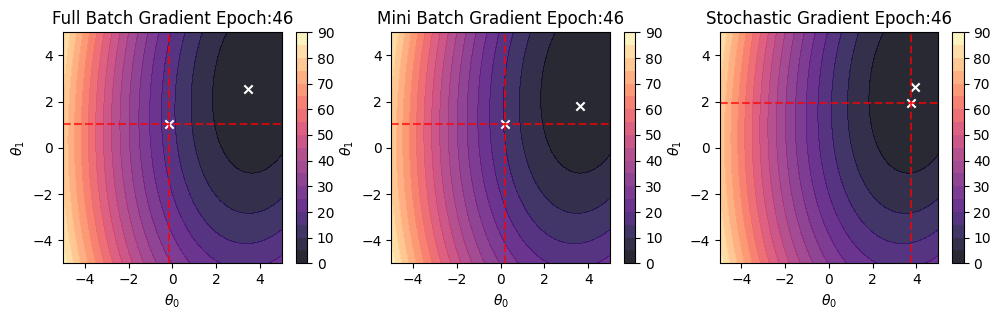

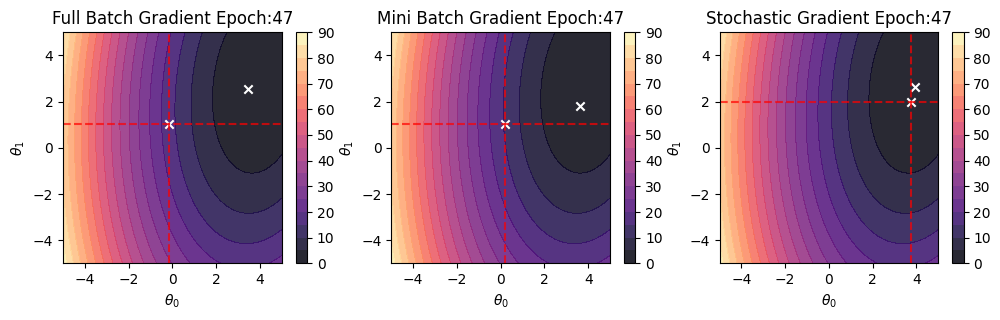

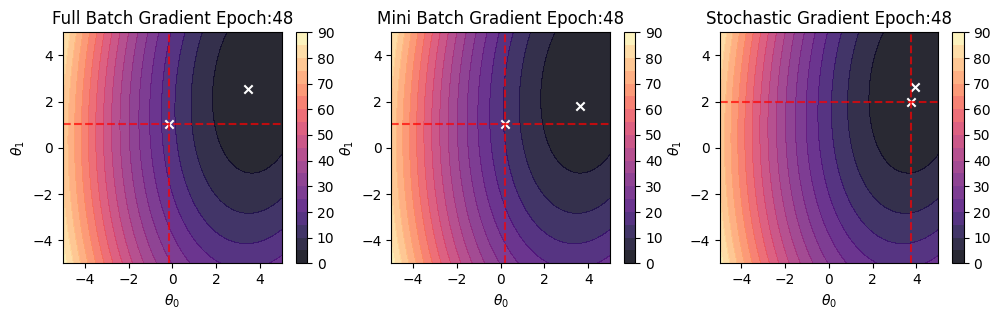

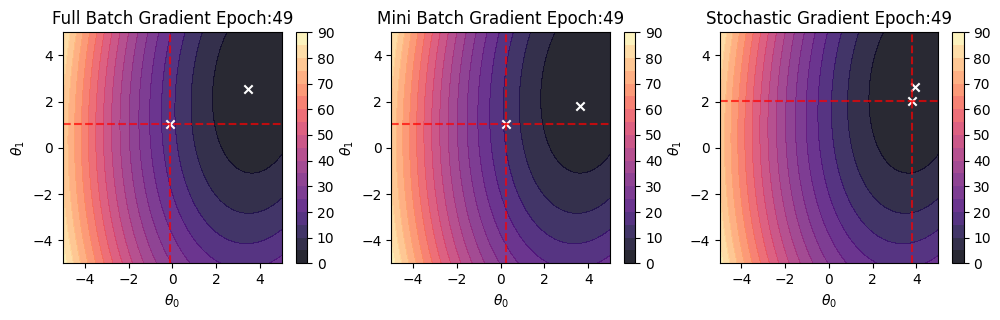

In [15]:
epochnumber=min(fullepochs,miniepochs,stochasticepochs)

for i in range(50):
    fig=plt.figure(figsize=(12,3))
    
    ax1=fig.add_subplot(131)
    ax2=fig.add_subplot(132)
    ax3=fig.add_subplot(133)

    create_contour_plot(f,ax1,full_batch_theta,i,'Full Batch Gradient')
    create_contour_plot(f,ax2,mini_batch_theta,i,'Mini Batch Gradient')
    create_contour_plot(f,ax3,stochastic_theta,i,'Stochastic Gradient')
    plt.show()

Text(0, 0.5, 'Loss')

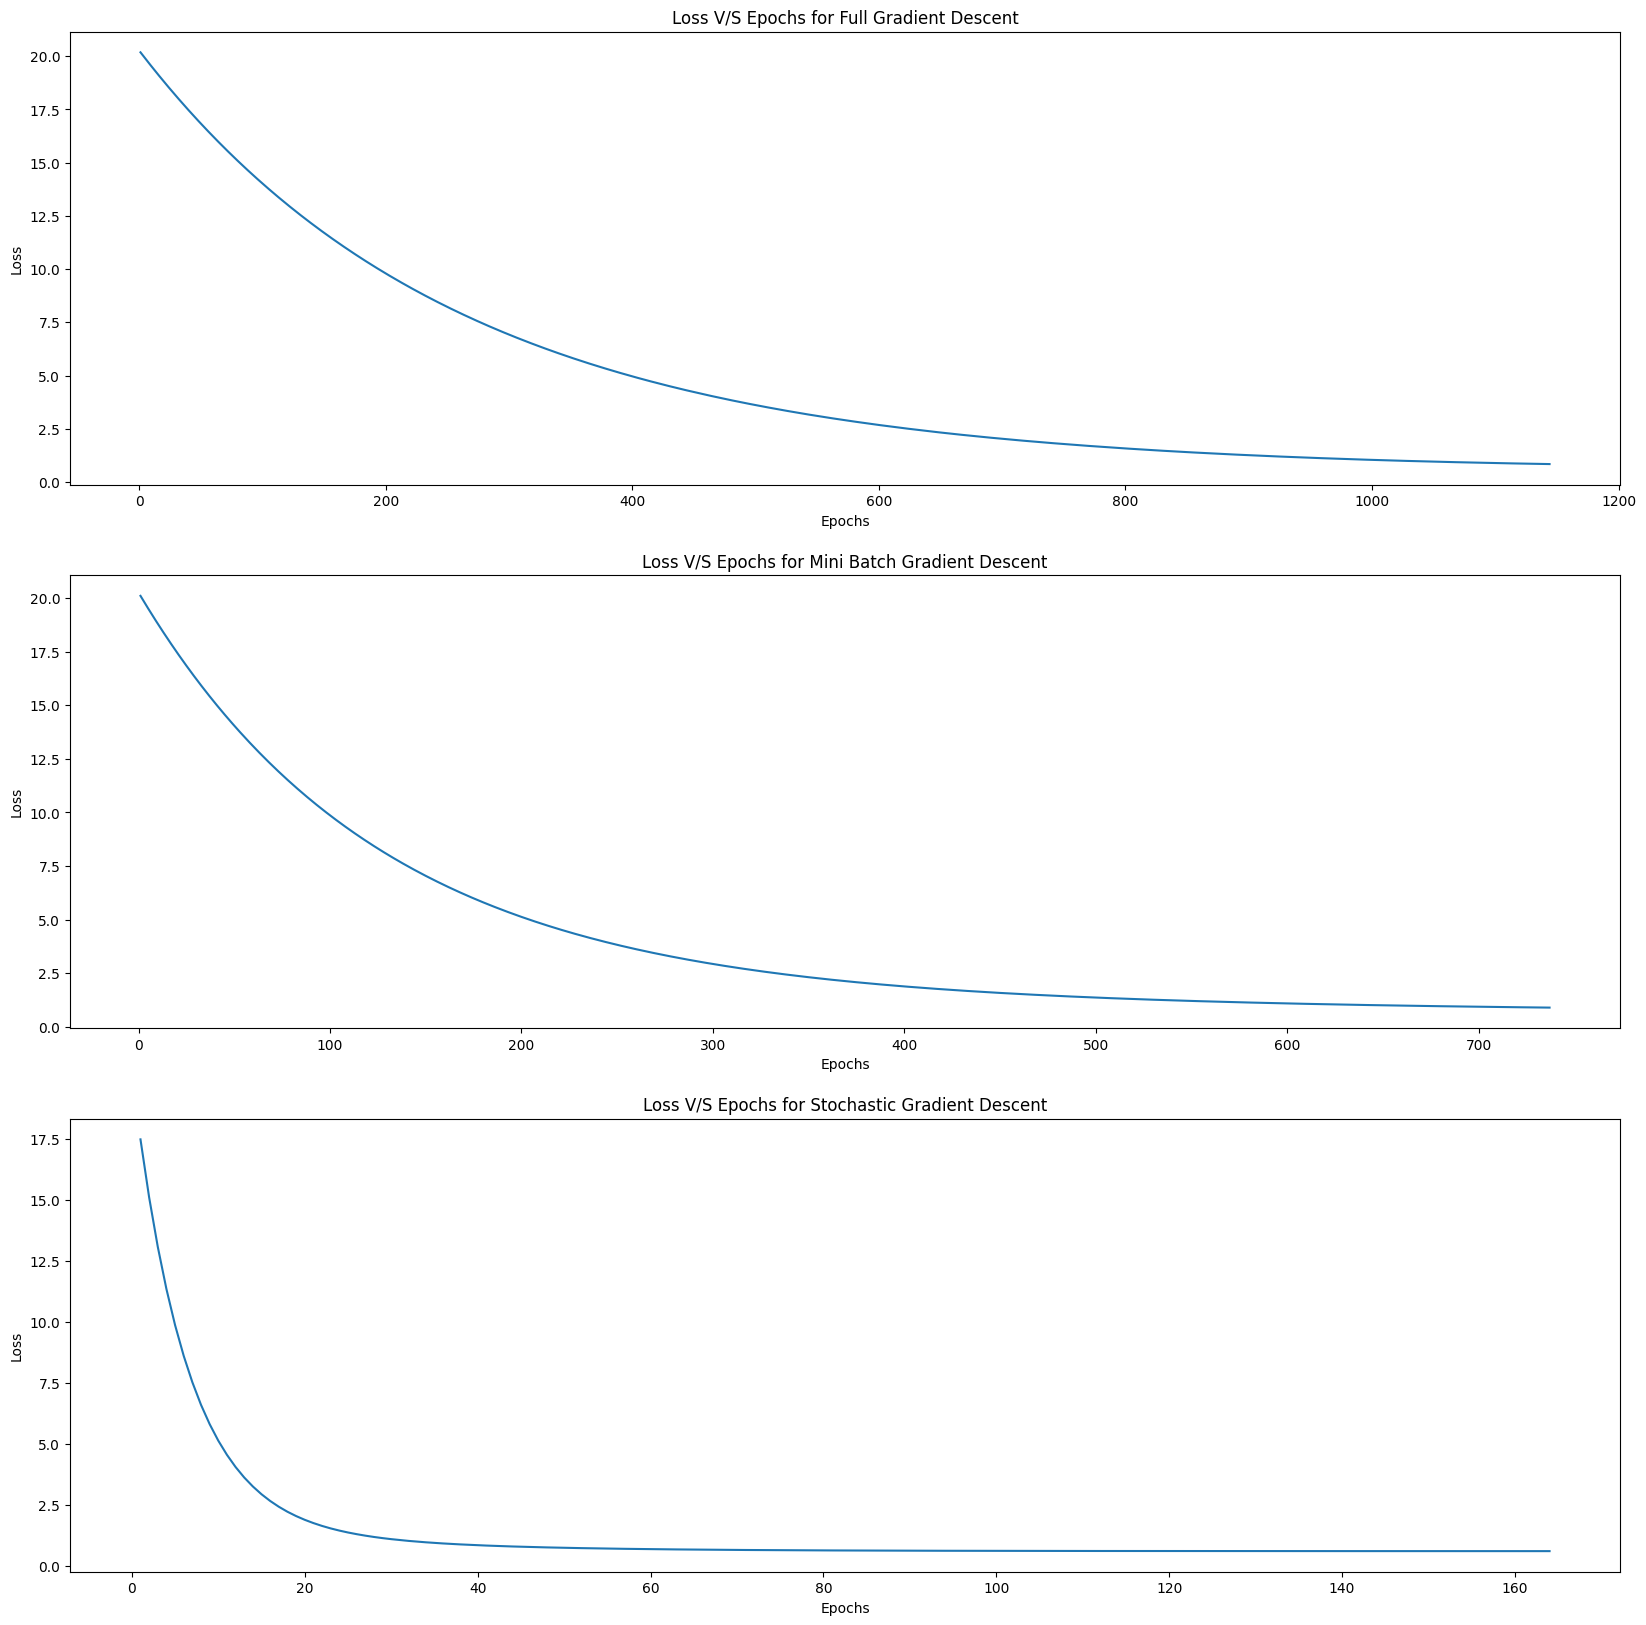

In [16]:
fig = plt.figure(figsize=(20,20))
    
ax1=fig.add_subplot(311)
ax1.plot(np.arange(1,fullepochs+1),full_batch_losses)
ax1.set_title("Loss V/S Epochs for Full Gradient Descent")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax2=fig.add_subplot(312)
ax2.plot(np.arange(1,miniepochs+1),mini_batch_losses)
ax2.set_title("Loss V/S Epochs for Mini Batch Gradient Descent")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax3=fig.add_subplot(313)
ax3.plot(np.arange(1,stochasticepochs+1),stochastic_losses)
ax3.set_title("Loss V/S Epochs for Stochastic Gradient Descent")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")

Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for bothdataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45)
num_samples=40

x1=np.random.uniform(-1,1,num_samples)
f_x=3*x1+4
eps=np.random.randn(num_samples)
y_actual=f_x+eps

theta_val=np.random.uniform(-1,1,2)

def transform(x):
    return np.hstack([np.ones((x.shape[0],1)),x.reshape(-1,1)])

def loss(X,theta,y):
    return ((X@theta-y)**2).mean()/2

def gradient(X,theta,y):
    return (X.T@(X@theta-y))/len(y)

def vanilla_gradient(x,theta,y,E,learning_rate,epsilon):
    loss_list,theta_values,diff_loss=[],[],[]
    gradient_list=[]
    X=transform(x)
    theta_values.append(theta.copy())
    prevloss=0.0
    for epoch in range(E+1):
        per=np.random.permutation(len(y))
        x_new=X[per]
        y_new=y[per]
        currentloss=loss(X,theta,y)
        gradient_val=gradient(x_new, theta, y_new)
        theta=theta-learning_rate*gradient_val
        loss_list.append(loss(x_new,theta,y_new))
        theta_values.append(theta.copy())
        gradient_list.append(gradient_val.copy())
        if abs(currentloss-prevloss)<epsilon:
            break
        diff_loss.append(abs(currentloss-prevloss))
        prevloss=currentloss
    return epoch,loss_list,theta_values,diff_loss,gradient_list

def gradient_descent_momentum(x,theta,y,momentum,E,learning_rate,epsilon):
    change=0.0
    loss_list,theta_values,diff_loss=[],[],[]
    gradient_list=[]
    momentum_val=[]
    X=transform(x)
    theta_values.append(theta.copy())
    prevloss=0.0
    for epoch in range(E+1):
        per=np.random.permutation(len(y))
        x_new=X[per]
        y_new=y[per]
        currentloss=loss(x_new,theta,y_new)
        gradient_val=gradient(x_new,theta,y_new)
        newchange=(learning_rate*gradient_val)+(change*momentum)
        momentum_val.append(newchange)
        theta=theta-newchange
        change=newchange
        loss_list.append(loss(x_new,theta,y_new))
        theta_values.append(theta.copy())
        gradient_list.append(gradient_val.copy())
        if abs(currentloss-prevloss)<epsilon:
            break
        diff_loss.append(abs(currentloss-prevloss))
        prevloss=currentloss
    return epoch,loss_list,theta_values,diff_loss,gradient_list,momentum_val

def create_XYZ(f):
    x=np.linspace(-5,5,100)
    y=np.linspace(-5,5,100)
    X,Y=np.meshgrid(x,y)
    Z=np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j]=f([X[i,j],Y[i,j]])
    return X,Y,Z

def create_contour_plot(loss_func,ax_plot,theta_values,i,title,gradients,momentums):
    X,Y,Z=create_XYZ(loss_func)

    contour_plot=ax_plot.contourf(X,Y,Z,levels=20,cmap='magma',alpha=0.85)
    plt.colorbar(contour_plot,ax=ax_plot)

    ax_plot.scatter(theta_values[i][0],theta_values[i][1],marker='x',color='white')
    ax_plot.scatter(theta_values[-1][0],theta_values[-1][1],marker='x',color='white')
    ax_plot.axhline(y=theta_values[i][1],color='red',linestyle='--',alpha=0.7)
    ax_plot.axvline(x=theta_values[i][0],color='red',linestyle='--',alpha=0.7)

    ax_plot.quiver(theta_values[i][0],theta_values[i][1],-gradients[i][0],-gradients[i][1],
                   angles='xy',scale_units='xy',scale=1,color='red',label='Gradient')

    if np.linalg.norm(momentums[i])>0:
        ax_plot.quiver(theta_values[i][0],theta_values[i][1],-momentums[i][0],-momentums[i][1],
                       angles='xy',scale_units='xy',scale=50,color='blue',label='Momentum')

    ax_plot.set_title(title+f' Epoch: {i+1}')
    ax_plot.set_xlabel(r"$\theta_0$")
    ax_plot.set_ylabel(r"$\theta_1$")

f=lambda theta:loss(transform(x1),theta,y_actual)
E1_values,E2_values=[],[]

for i in range(10):
    E1,momentum_loss,momentum_theta,momentum_conv,momentum_gradients,momentum_values=gradient_descent_momentum(x1,theta_val,y_actual,0.3,10000,0.005,0.001)
    E2,vanilla_loss,vanilla_theta,vanilla_conv,vanilla_gradients=vanilla_gradient(x1,theta_val,y_actual,10000,0.005,0.001)
    E1_values.append(E1)
    E2_values.append(E2)

In [18]:
print(f"Average number of steps taken by Gradient Descent with Momentum: {np.array(E1_values).mean()}")
print(f"Average number of steps taken by Vanilla Gradient Descent: {np.array(E2_values).mean()}")

Average number of steps taken by Gradient Descent with Momentum: 398.0
Average number of steps taken by Vanilla Gradient Descent: 513.0


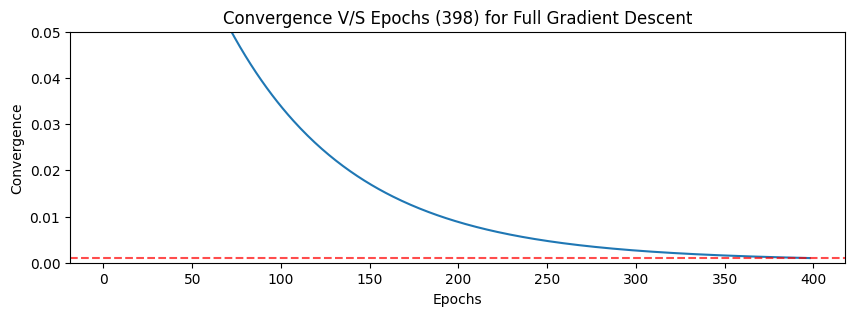

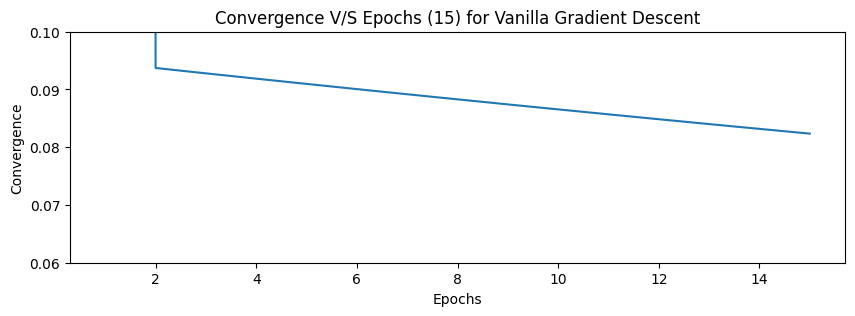

In [19]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(1,16),momentum_conv[:15])
plt.ylim([0,0.5])
plt.title("Convergence V/S Epochs (15) for Gradient Descent with Momentum")
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(np.arange(1,E1+1),momentum_conv)
plt.ylim([0,0.05])
plt.title(f"Convergence V/S Epochs ({E1}) for Full Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.axhline(y=0.001,color='red',linestyle='--',alpha=0.7)
plt.plot
plt.show()

plt.figure(figsize=(10,3))
plt.plot(np.arange(1,16),vanilla_conv[:15])
plt.ylim([0.06,0.1])
plt.title("Convergence V/S Epochs (15) for Vanilla Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(np.arange(1,E2+1),vanilla_conv)
plt.title(f"Convergence V/S Epochs ({E2}) for Mini Gradient Descent")
plt.ylim([0,0.05])
plt.xlabel("Epochs")
plt.ylabel("Convergence")
plt.axhline(y=0.001,color='red',linestyle='--',alpha=0.7)
plt.plot
plt.show()

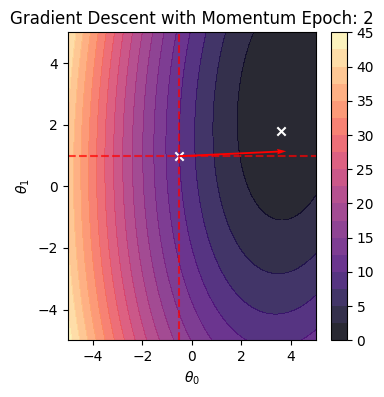

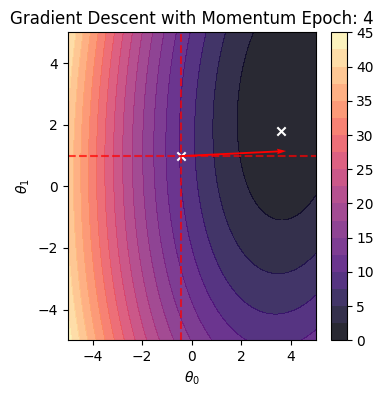

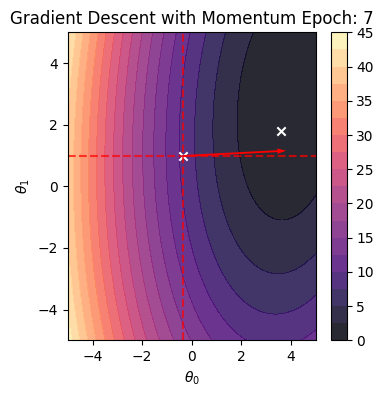

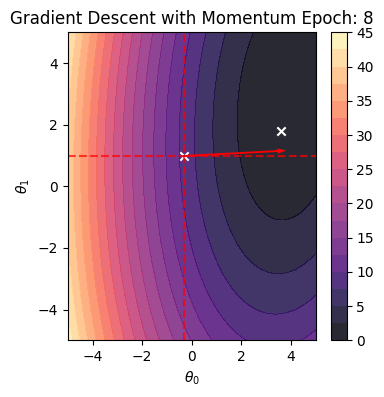

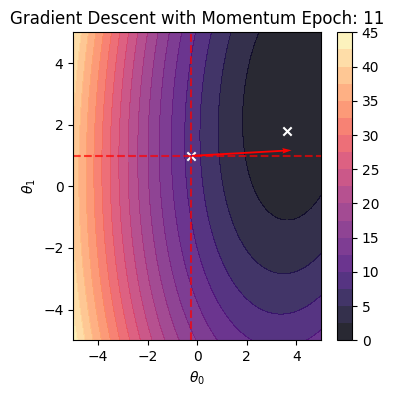

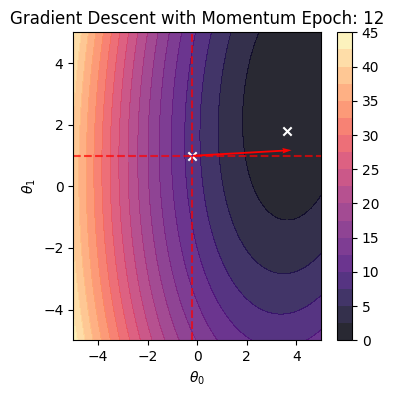

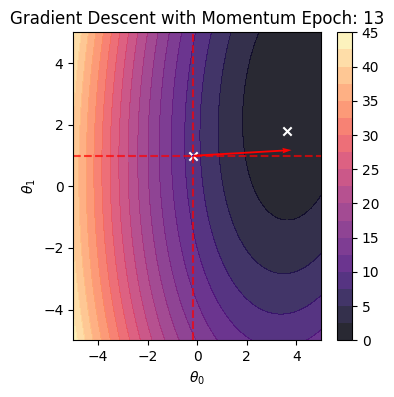

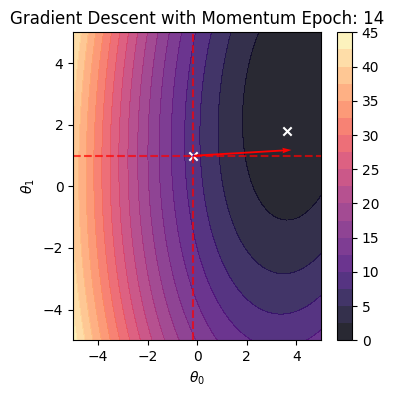

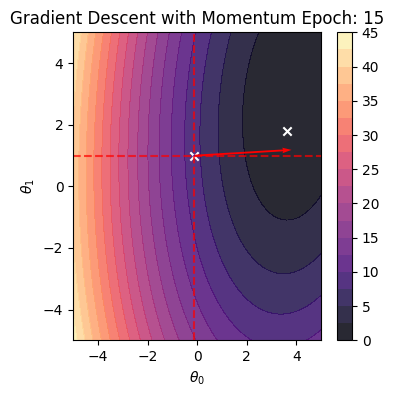

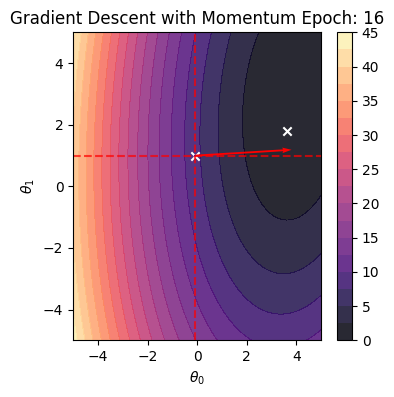

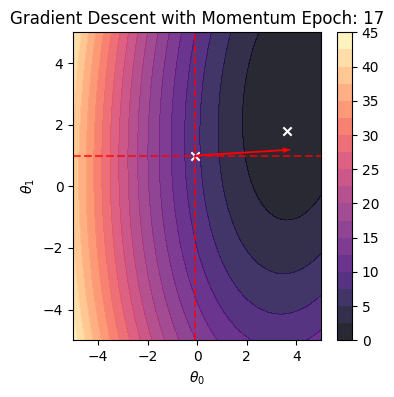

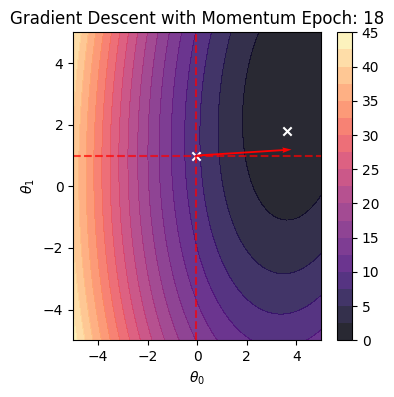

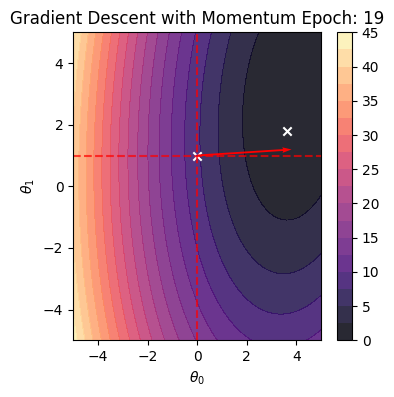

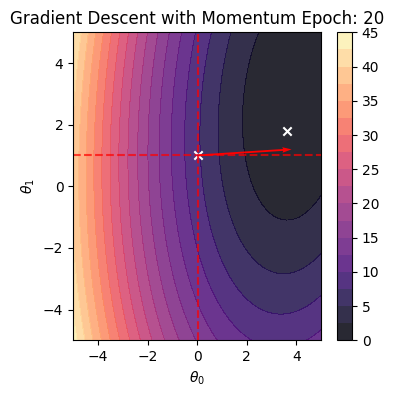

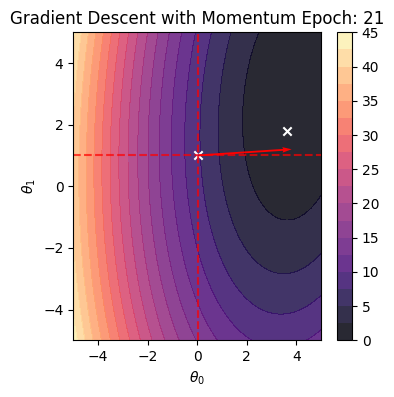

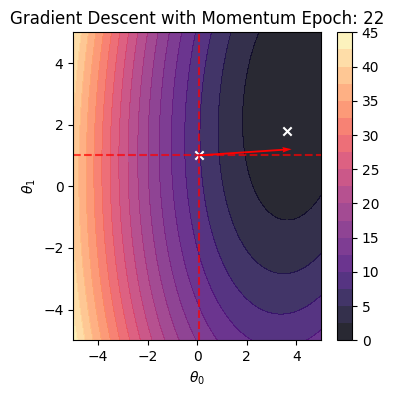

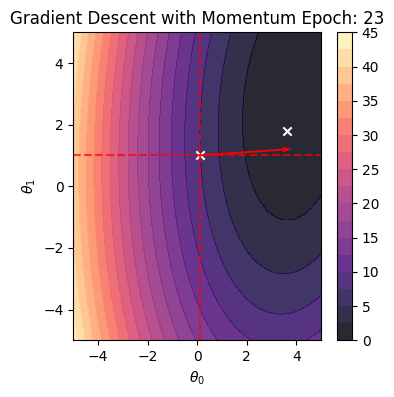

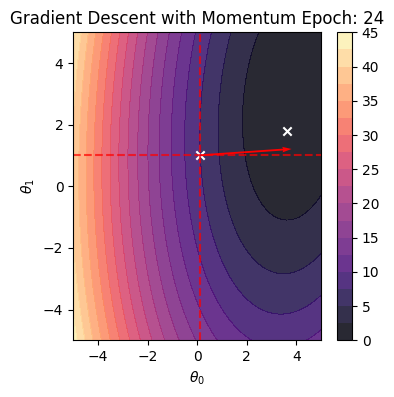

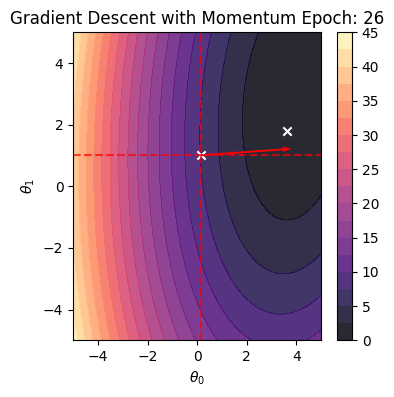

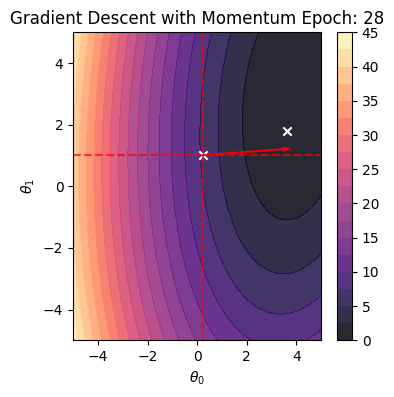

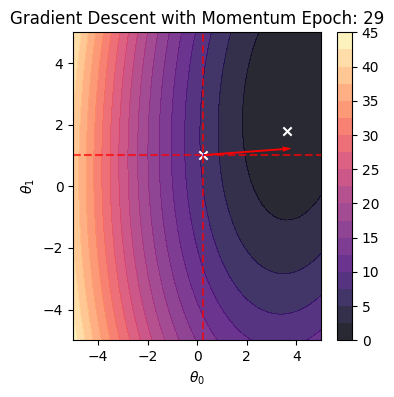

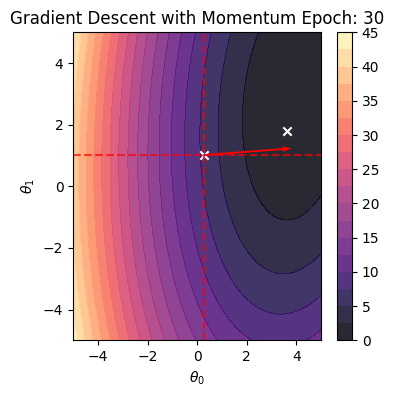

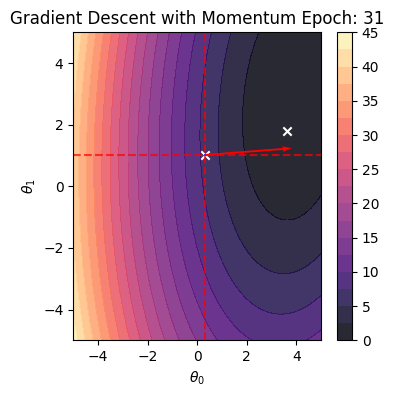

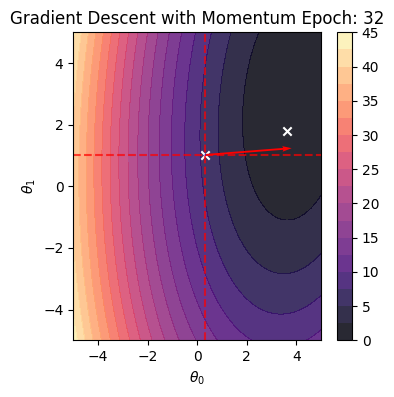

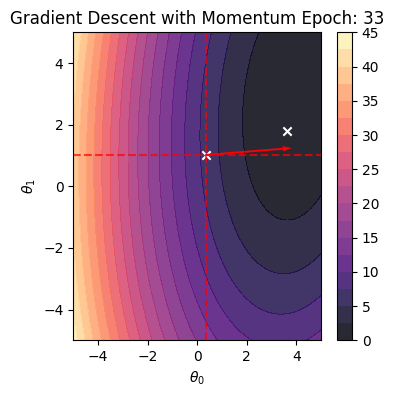

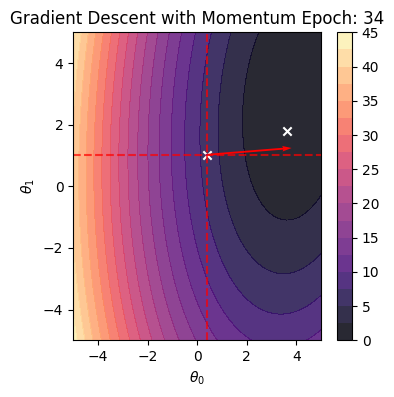

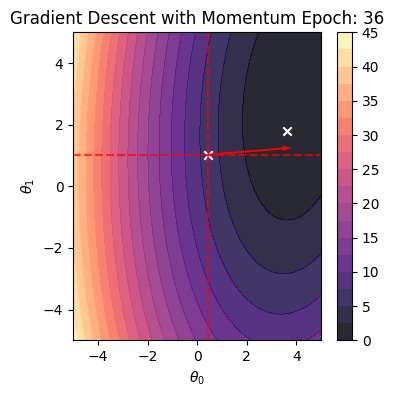

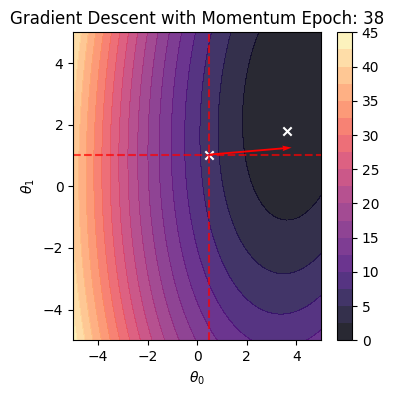

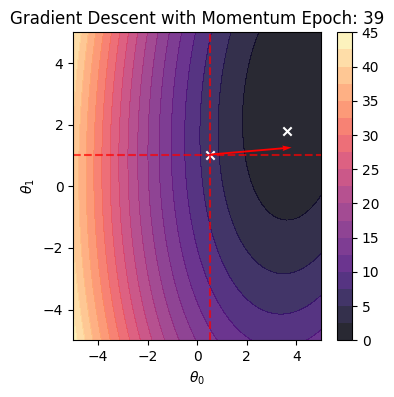

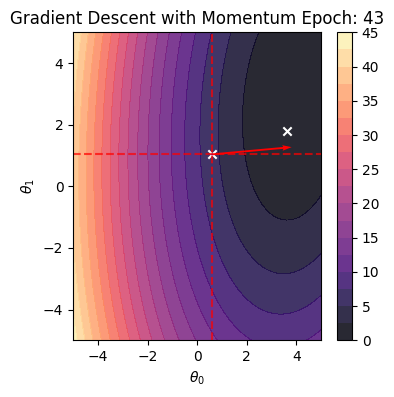

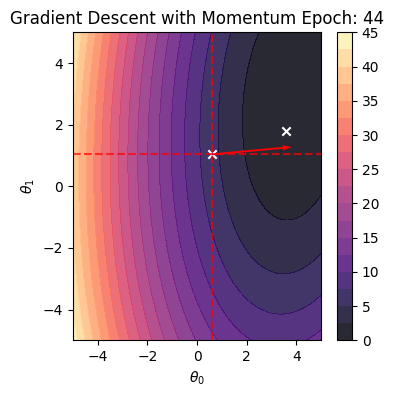

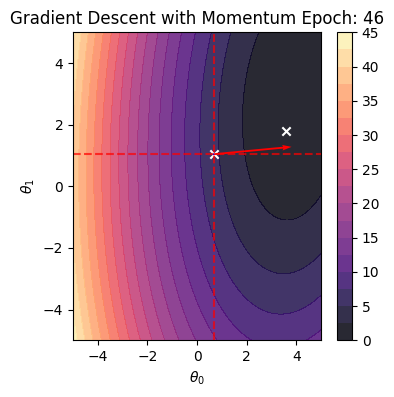

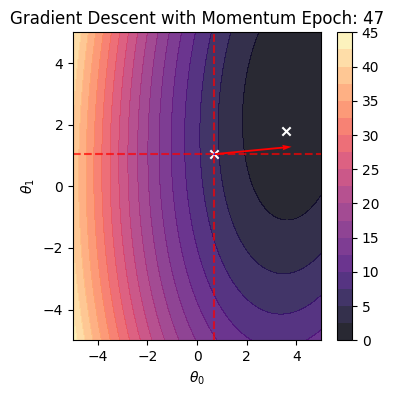

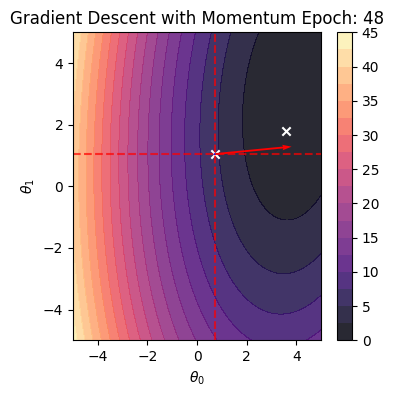

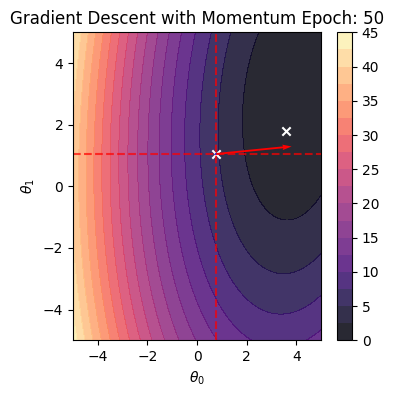

In [20]:
for i in range(50):
    fig,ax =plt.subplots(figsize=(4, 4))
    create_contour_plot(f,ax,momentum_theta,i,'Gradient Descent with Momentum',momentum_gradients,momentum_values)
    plt.show()
    plt.close(fig)
